# Sales Report Suspiciousness Detection : Exploratory Data Analysis using visualizations


## Problem Description



### Analysis Objectives



### Data Set Description



### Considerations / Assumptions



### Algorithm Class



### Given constraints



### Main Tasks




## Import libraries

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import warnings
import os
import random
import matplotlib.pyplot as plt     
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as impipe
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc, accuracy_score,classification_report, recall_score,precision_score,precision_recall_curve,average_precision_score, silhouette_score,roc_curve, auc,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score,f1_score, precision_recall_fscore_support
from sklearn.model_selection import learning_curve
import graphviz
from sklearn import tree
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot




## Set Environment for Execution

In [2]:
def set_env_var():
    InteractiveShell.ast_node_interactivity = "all"
    warnings.filterwarnings('ignore')
    os.environ['KMP_DUPLICATE_LIB_OK']='True'
    pd.set_option('display.max_rows', 60)
    pd.set_option('display.max_columns', 60)
    init_notebook_mode(connected=True)
    %matplotlib inline


set_env_var()


## Set Seed for consistent execution

In [3]:
def set_seed(seed=777):
    return random.seed(seed)

seed_constant = 776
set_seed(seed_constant)


## Import required data 

In [4]:
def data_importer_xlsx(data_path, na_values=[]):
    dataF = pd.read_excel(data_path, na_values=na_values)
    print("The number of Rows in the Data set  = "+str(dataF.shape[0]))
    print("The number of Columns in the data set = " +str(dataF.shape[1]))
    return dataF

salesReportData=data_importer_xlsx("/Users/samyam/Documents/Samya/GIT/insofe/Final_PHD/PHD_TrainData_and_ProblemStatement_actual/Train.xlsx")

The number of Rows in the Data set  = 42582
The number of Columns in the data set = 6


## Split data for analysis

In [5]:
#salesReportDataTrain, salesReportDataTestVal = train_test_split(salesReportData, test_size=0.2, random_state=seed_constant, stratify=salesReportData['Suspicious'])
#salesReportDataValidate, salesReportDataTest = train_test_split(salesReportDataTestVal, test_size=0.5, random_state=seed_constant, stratify=salesReportDataTestVal['Suspicious'])

salesReportDataTrain, salesReportDataTest = train_test_split(salesReportData, test_size=0.15, random_state=seed_constant, stratify=salesReportData['Suspicious'])

print("Train Set shape :",salesReportDataTrain.shape)
print("Test Set shape :",salesReportDataTest.shape)

Train Set shape : (36194, 6)
Test Set shape : (6388, 6)


## Feature Analysis of given data

In [6]:
def data_description(dataF):
    print("The columns in the data set are : \n",list(dataF.columns))
    print("The data types of the columns are :\n\n",dataF.dtypes)
    
data_description(salesReportDataTrain)

The columns in the data set are : 
 ['ReportID', 'SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue', 'Suspicious']
The data types of the columns are :

 ReportID           object
SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object


### Check the first and last 5 rows in dataset to get an understanding of data

In [7]:
salesReportDataTrain.head()
salesReportDataTrain.tail()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
26235,Rep36336,C21448,PR6235,163,1890,indeterminate
9840,Rep19941,C22174,PR6326,82,1165,indeterminate
26954,Rep37055,C21236,PR6675,305,32915,indeterminate
21044,Rep31145,C21387,PR6253,101,1010,indeterminate
5175,Rep15276,C22185,PR6211,481,2110,indeterminate


,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
4393,Rep14494,C22000,PR6329,272,8460,indeterminate
30329,Rep40430,C21699,PR6675,104,1345,indeterminate
33999,Rep44100,C21823,PR6697,7064,35160,indeterminate
19672,Rep29773,C21638,PR6253,103,1005,indeterminate
23007,Rep33108,C21189,PR6223,612,7340,indeterminate


### Random Sample rows

In [8]:
def get_data_sample(dataF, num_sample=10):
    return pd.DataFrame(dataF.sample(num_sample))

get_data_sample(salesReportDataTrain)

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
27957,Rep38058,C21565,PR6383,104,5715,indeterminate
39807,Rep49908,C21941,PR6458,102,1730,indeterminate
3100,Rep13201,C22049,PR6248,344,2595,indeterminate
18260,Rep28361,C22220,PR6526,11927,12330,indeterminate
38128,Rep48229,C21579,PR6643,106,2280,indeterminate
28804,Rep38905,C21720,PR6595,102,1245,indeterminate
6738,Rep16839,C21487,PR6387,170,1785,indeterminate
32204,Rep42305,C21389,PR6253,123,2890,No
7943,Rep18044,C22136,PR6259,4251,15440,indeterminate
42003,Rep52104,C21777,PR6703,3841,26215,indeterminate


### Distribution of target attribute

indeterminate    33868
No                2172
Yes                154
Name: Suspicious, dtype: int64
indeterminate    93.573520
No                6.000995
Yes               0.425485
Name: Suspicious, dtype: float64


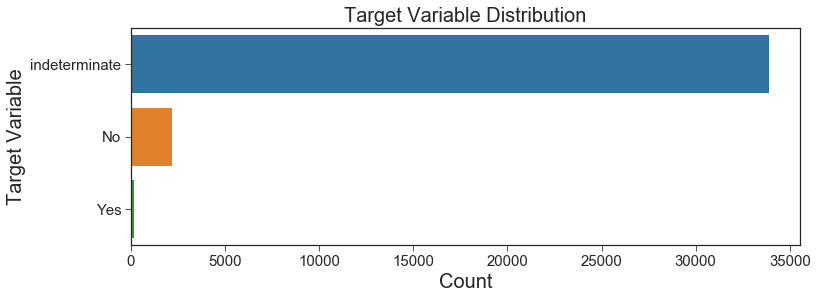

In [9]:
def plot_data_dist_across_targ(dataF, target):
    """
    Plot target variable distribution
    """
    
    print(dataF[target].value_counts())
    print((dataF[target].value_counts()/dataF[target].count())*100)
    
    plt.figure(figsize=(12,4))
    plt.style.use('seaborn-ticks')
    plot_1 = sns.countplot(y=target, data=dataF, order = dataF[target].value_counts().index);
    plot_1.axes.set_title("Target Variable Distribution",fontsize=20);
    plot_1.set_xlabel("Count",fontsize=20);
    plot_1.set_ylabel("Target Variable",fontsize=20);
    plot_1.tick_params(labelsize=15);
    plt.show();

    
plot_data_dist_across_targ(salesReportDataTrain, "Suspicious")

### Check count of null in each column & its percent

In [10]:
def get_null_count_per_attribute(dataF): 
    return pd.DataFrame({'total_missing': dataF.isnull().sum(), 
                         'perc_missing': (dataF.isnull().sum()/dataF.shape[0])*100}).sort_values(
        by=['perc_missing'], ascending=False)

get_null_count_per_attribute(salesReportDataTrain)

,total_missing,perc_missing
ReportID,0,0.0
SalesPersonID,0,0.0
ProductID,0,0.0
Quantity,0,0.0
TotalSalesValue,0,0.0
Suspicious,0,0.0


### Check for count of unique values in different attriutes

In [11]:
def get_unique_value_count_per_attribute(dataF): 
    return pd.DataFrame((dataF.nunique()/dataF.shape[0])*100).rename(
        {0: 'perc_unique'}, axis=1).sort_values(by=['perc_unique'])

get_unique_value_count_per_attribute(salesReportDataTrain)

,perc_unique
Suspicious,0.008289
ProductID,1.638393
SalesPersonID,2.735260
Quantity,16.397745
TotalSalesValue,19.533624
ReportID,100.000000
